# Load BRATS images

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

Basic tasks

In [2]:
#flair
# filename = os.path.join(r'C:\Users\mahau\Desktop\Télécom\3A_S1\PRAKTIKUM-MLMI\Implementation\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_flair.nii.gz')
#seg
# filename = os.path.join(r'C:\Users\mahau\Desktop\Télécom\3A_S1\PRAKTIKUM-MLMI\Implementation\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_seg.nii.gz')
#T1
# filename = os.path.join(r'C:\Users\mahau\Desktop\Télécom\3A_S1\PRAKTIKUM-MLMI\Implementation\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_t1.nii.gz')
#T1ce
# filename = os.path.join(r'C:\Users\mahau\Desktop\Télécom\3A_S1\PRAKTIKUM-MLMI\Implementation\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_t1ce.nii.gz')
#T2
filename = os.path.join(r'C:\Users\mahau\Desktop\Télécom\3A_S1\PRAKTIKUM-MLMI\Implementation\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_t2.nii.gz')

In [3]:
img = nib.load(filename)
print(img.shape)
print(type(img))

(240, 240, 155)
<class 'nibabel.nifti1.Nifti1Image'>


In [7]:
img = nib.load(filename).get_fdata()
print(img[:][:][70].shape)
img.astype(float)
print(type(img))

(240, 155)
<class 'numpy.ndarray'>


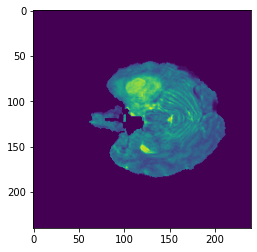

In [32]:
plt.imshow(img[:,:,50]) #40 - 130
plt.show()

Save the slices

In [ ]:
plt.imsave('./data_slices/test.png', img[:,:,100])

In [98]:
#flair
flair_filename = os.path.join(r'C:\Users\mahau\Desktop\Télécom\3A_S1\PRAKTIKUM-MLMI\Implementation\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_flair.nii.gz')
flair_img = nib.load(flair_filename).get_fdata()
#seg
seg_filename = os.path.join(r'C:\Users\mahau\Desktop\Télécom\3A_S1\PRAKTIKUM-MLMI\Implementation\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_seg.nii.gz')
seg_img = nib.load(seg_filename).get_fdata()
#T1
t1_filename = os.path.join(r'C:\Users\mahau\Desktop\Télécom\3A_S1\PRAKTIKUM-MLMI\Implementation\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_t1.nii.gz')
t1_img = nib.load(t1_filename).get_fdata()
#T1ce
t1ce_filename = os.path.join(r'C:\Users\mahau\Desktop\Télécom\3A_S1\PRAKTIKUM-MLMI\Implementation\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_t1ce.nii.gz')
t1ce_img = nib.load(t1ce_filename).get_fdata()
#T2
t2_filename = os.path.join(r'C:\Users\mahau\Desktop\Télécom\3A_S1\PRAKTIKUM-MLMI\Implementation\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_t2.nii.gz')
t2_img = nib.load(t2_filename).get_fdata()
for i in range (90):
    plt.imsave('./data_slices/flair/BraTS20_Training_001_'+str(i)+'.png', flair_img[:,:,40+i], cmap='gray')
    plt.imsave('./data_slices/seg/BraTS20_Training_001_'+str(i)+'.png', seg_img[:,:,40+i], cmap='gray')
    plt.imsave('./data_slices/t1/BraTS20_Training_001_'+str(i)+'.png', t1_img[:,:,40+i], cmap='gray')
    plt.imsave('./data_slices/t1ce/BraTS20_Training_001_'+str(i)+'.png', t1ce_img[:,:,40+i], cmap='gray')
    plt.imsave('./data_slices/t2/BraTS20_Training_001_'+str(i)+'.png', t2_img[:,:,40+i], cmap='gray')

In [6]:
# ???
def save_data(path, slice):
    # path (str): access to the 3D image; slice (int): number of the slice image
    filename = os.path.join(path)
    img = nib.load(filename).get_fdata()
    a=path.split('.nii.gz')
    b=a[0].split('C:\\Users\\mahau\\Desktop\\Télécom\\3A_S1\\PRAKTIKUM-MLMI\\Implementation\\')
    plt.imsave('./data_slices/'+b[1]+'_'+str(slice)+'.png', img[:,:,40+i])

Show some Slices

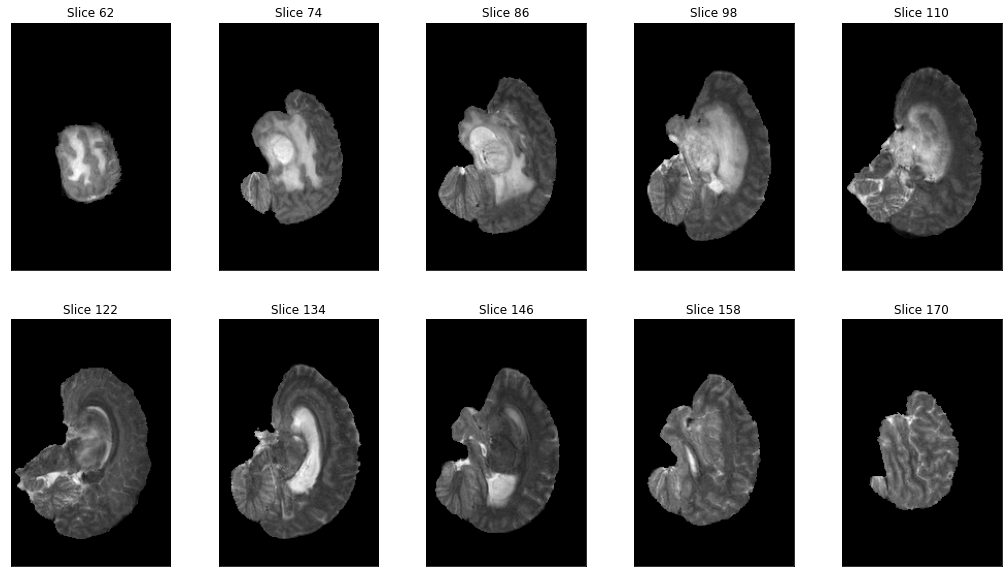

In [79]:
plt.figure(figsize=(18,10))
for i in range (1,11):
    plt.subplot(2,5,i), plt.imshow(img[50+12*i], cmap='gray'),plt.title('Slice '+str(50+12*i))
    plt.xticks([]), plt.yticks([])
plt.show()

# Mask tumor

In [3]:
import cv2

image_flair = cv2.imread(r'.\data_slices\flair\BraTS20_Training_001_26.png', cv2.IMREAD_GRAYSCALE)
image_seg = cv2.imread(r'.\data_slices\seg\BraTS20_Training_001_26.png', cv2.IMREAD_GRAYSCALE)

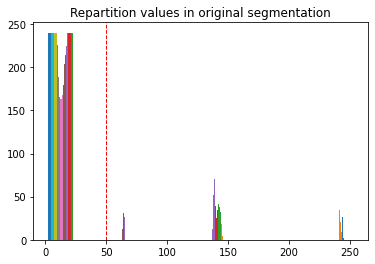

In [4]:
plt.hist(image_seg), plt.title('Repartition values in original segmentation')
plt.axvline(x=50, color='r', linestyle='dashed', linewidth=1)
plt.show()

In [113]:
new_mask = image_seg.copy()
seuil = 50
for i in range (len(new_mask)):
    for j in range (len(new_mask[0])):
        if seuil < new_mask[i][j]:
            new_mask[i][j] = 0
        else:
            new_mask[i][j] = 255

masked = cv2.bitwise_and(image_flair, image_flair, mask=new_mask)

for i in range (len(masked)):
    for j in range (len(masked[0])):
        if masked[i][j]==0:
            masked[i][j] = 30
plt.imsave('./masked_test_1.png', masked, cmap='gray')

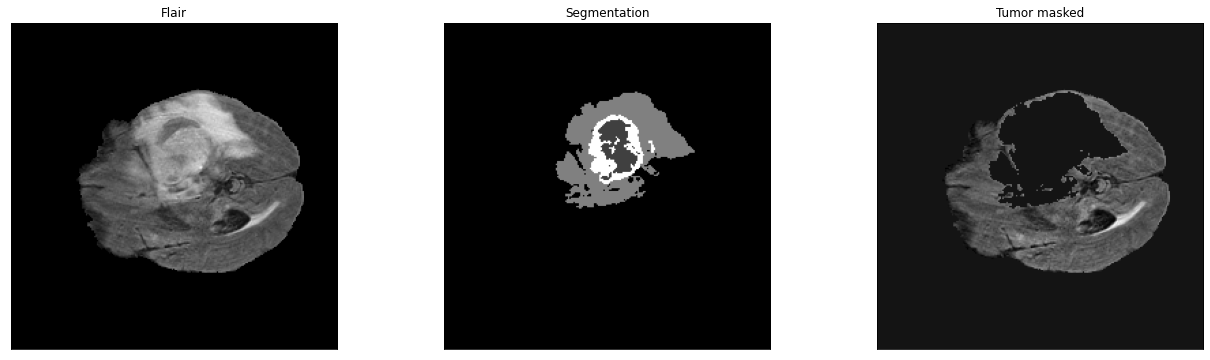

In [114]:
plt.figure(figsize=(22,6))
plt.subplot(131), plt.imshow(image_flair, cmap='gray'),plt.title('Flair')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image_seg, cmap='gray'),plt.title('Segmentation')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(masked, cmap='gray'),plt.title('Tumor masked')
plt.xticks([]), plt.yticks([])
plt.show()

# Image pre-processing

In [7]:
import cv2
import imutils
import matplotlib.pyplot as plt
import albumentations as A
from PIL import Image
import torchvision.transforms as transforms

Keep only the brain region

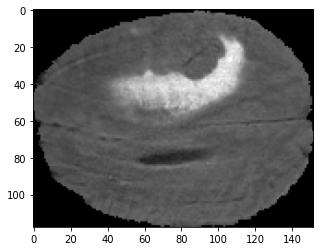

In [16]:
def crop_img(img):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #gray = cv2.GaussianBlur(gray, (3, 3), 0)
    gray = cv2.GaussianBlur(img, (3, 3), 0)

    # threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    ADD_PIXELS = 0
    new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
    
    return new_img
    
image = cv2.imread(r'.\data_slices\BraTS20_Training_001_flair_60.png', cv2.IMREAD_GRAYSCALE)
new_img = crop_img(image)
plt.imshow(new_img, cmap='gray')
plt.show()

In [26]:
max_num=0
min_num=0
for i in range (new_img[:,1].shape[0]):
    for j in range (new_img[0].shape[0]):
        if new_img[i,j]>max_num:
            max_num = new_img[i,j]
        if new_img[i,j]<min_num:
            min_num = new_img[i,j]
print(min_num, max_num)
# 0: black, 255: white


0 215


rotate, brightens, flip

https://github.com/KSH0660/BrainTumor/blob/master/dataloader.py

In [51]:
def rotate(image):
    image = A.Compose([A.ShiftScaleRotate(p=20)])
    image = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Grayscale(num_output_channels=1),
            transforms.ToTensor()])
    return image

def bright_contrast(image):
    image.transform = A.Compose([A.RandomBrightnessContrast(p=0.3)])

def flip(image):
    image.transform = A.Compose([A.HorizontalFlip(p=0.3)])

a = rotate(Image.fromarray(image))
a

Compose(
    ToPILImage()
    Grayscale(num_output_channels=1)
    ToTensor()
)